In [1]:
#IMPORT NECESSARY LIBRARY 
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
# IMPORT THE THREE DATASETS
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\LOCHAN RISHITHA\AppData\Local\Temp\ipykernel_20200\1699282656.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print("The shape of books dataset is :",books.shape)
print("The shape of ratings dataset is :",ratings.shape)
print("The shape of users dataset is :",users.shape)

The shape of books dataset is : (271360, 8)
The shape of ratings dataset is : (1149780, 3)
The shape of users dataset is : (278858, 3)


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
users.duplicated().sum()

0

In [13]:
books['Book-Title'].nunique()

242135

In [14]:
Book_Count_df=pd.DataFrame(books['Book-Title'].value_counts())
Book_Count_df

,count
Book-Title,
Selected Poems,27
Little Women,24
Wuthering Heights,21
The Secret Garden,20
Dracula,20
...,...
What Every Kid Should Know,1
The Seventh Enemy (A Brady Coyne Mystery),1
A Brace of Skeet,1


In [15]:
Book_Count_df.reset_index(inplace=True)

In [16]:
Book_Count_df

,Book-Title,count
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Dracula,20
...,...,...
242130,What Every Kid Should Know,1
242131,The Seventh Enemy (A Brady Coyne Mystery),1
242132,A Brace of Skeet,1
242133,"The Yellow Admiral (O'Brian, Patrick, Aubrey/M...",1


In [17]:
User_Rating_Count=pd.DataFrame(ratings['User-ID'].value_counts())
User_Rating_Count

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [18]:
User_Rating_Count.reset_index(inplace=True)

In [19]:
User_Rating_Count

,User-ID,count
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
105278,116180,1
105279,116166,1
105280,116154,1
105281,116137,1


In [20]:
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [21]:
value = ratings_with_name.loc[ratings_with_name['User-ID'] == 2].values[0]
print(value)

[2 '0195153448' 0 'Classical Mythology' 'Mark P. O. Morford' 2002
 'Oxford University Press'
 'http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg'
 'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'
 'http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg']


In [23]:
##PERFORMING EDA ON NUMERICAL COLUMNS..

In [24]:
#Histogram for Book rating

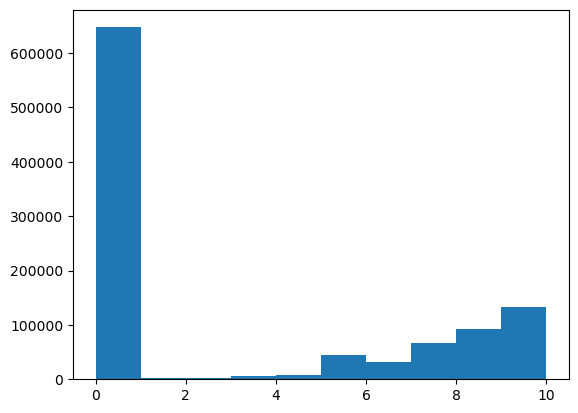

Skewdness of Book-Rating: 0.7524189628269676
Kurtosis of Book-Rating: -1.215033635178713


In [25]:
import matplotlib.pyplot as plt
plt.hist(ratings_with_name['Book-Rating'])
plt.show()
print("Skewdness of Book-Rating:",ratings_with_name['Book-Rating'].skew())
print("Kurtosis of Book-Rating:",ratings_with_name['Book-Rating'].kurt())

In [26]:
##BOX PLOTS ON Book rating

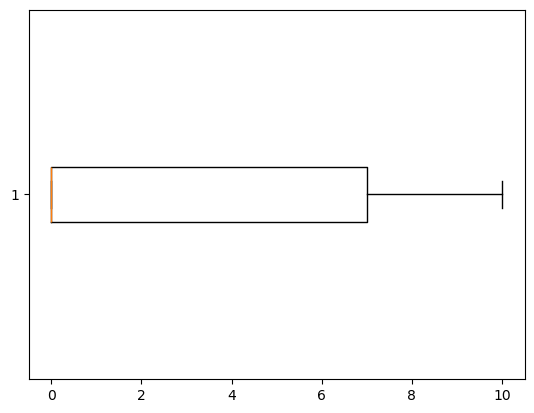

In [27]:
import matplotlib.pyplot as plt
plt.boxplot(ratings_with_name["Book-Rating"],vert=False)
plt.show()

In [28]:
import numpy as np
q1 = np.percentile(ratings_with_name["Book-Rating"],25)
print("25th percentile",q1)
q3 = np.percentile(ratings_with_name["Book-Rating"],75)
print("75th percentile",q3)
iqr = q3-q1
print("Inter quartile range:",iqr)

25th percentile 0.0
75th percentile 7.0
Inter quartile range: 7.0


C:\Users\LOCHAN RISHITHA\AppData\Local\Temp\ipykernel_20200\253771344.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ratings_with_name['Book-Rating'], shade=True)


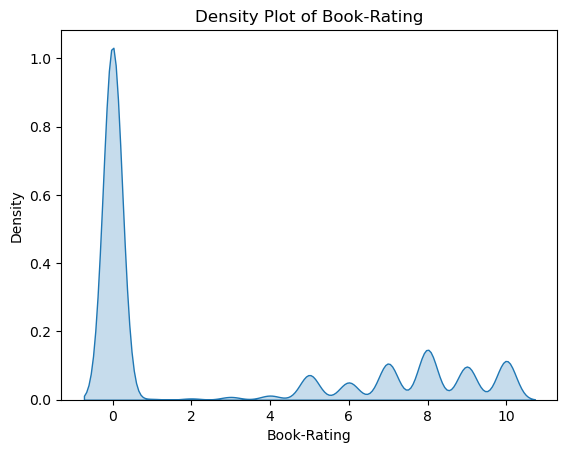

In [29]:
# Plotting density plot for Book rating
import seaborn as sns
sns.kdeplot(ratings_with_name['Book-Rating'], shade=True)
plt.title('Density Plot of Book-Rating')
plt.xlabel('Book-Rating')
plt.ylabel('Density')
plt.show()

In [30]:
##LET US PERFORM THE DATA VISUALIZATION FOR CATEGORICAL COLUMNS THAT IS BAR GRAPH AND IDENTIFY THE TOP 10 CATEGORIES

In [31]:
# Get the top 10 categories for ISBN
top_10=ratings_with_name["ISBN"].value_counts().head(10)
top_10

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
Name: count, dtype: int64

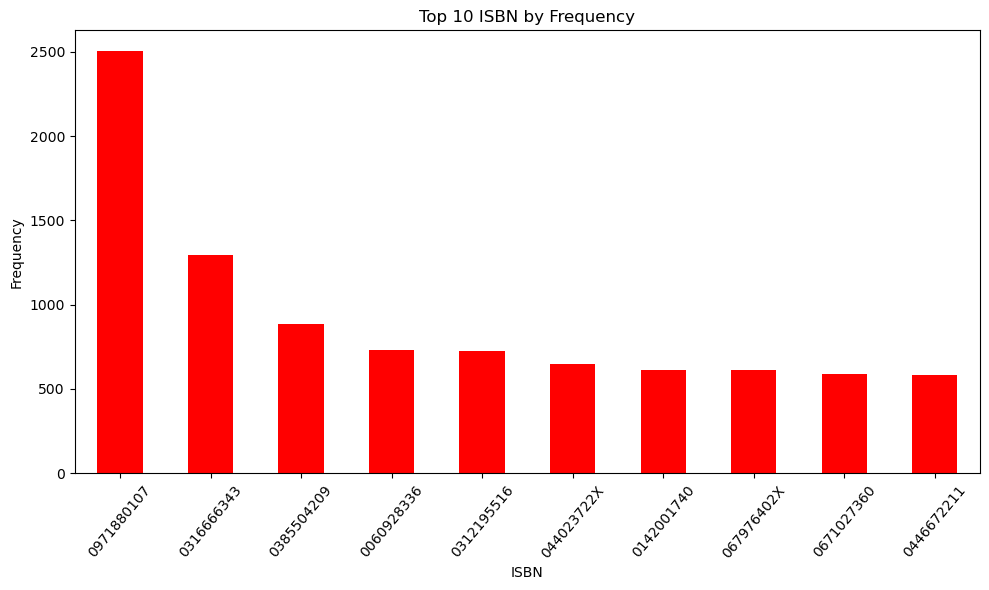

In [32]:
# Plotting the bar graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = "Red")
plt.xlabel('ISBN')
plt.ylabel('Frequency')
plt.title("Top 10 ISBN by Frequency")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [33]:
# Get the top 10 categories Book-Title
top_10=ratings_with_name["Book-Title"].value_counts().head(10)
top_10

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: count, dtype: int64

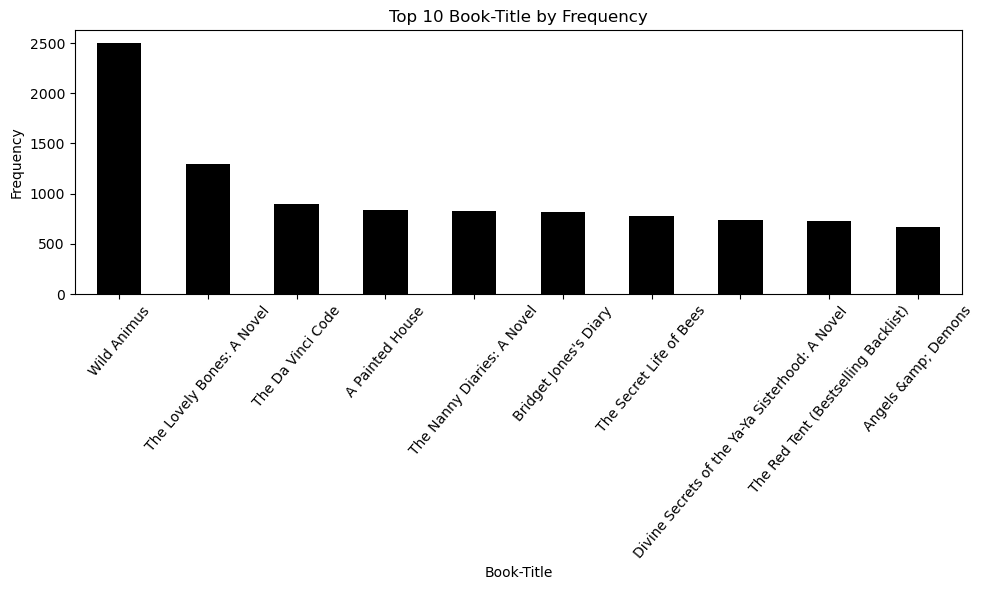

In [34]:
# Plotting the bar graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = 'black')
plt.xlabel('Book-Title')
plt.ylabel('Frequency')
plt.title("Top 10 Book-Title by Frequency")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [35]:
# Get the top 10 categories Book-Author
top_10=ratings_with_name["Book-Author"].value_counts().head(10)
top_10

Book-Author
Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
Dean R. Koontz         4313
Tom Clancy             4036
Danielle Steel         3726
Sue Grafton            3457
Janet Evanovich        3350
Name: count, dtype: int64

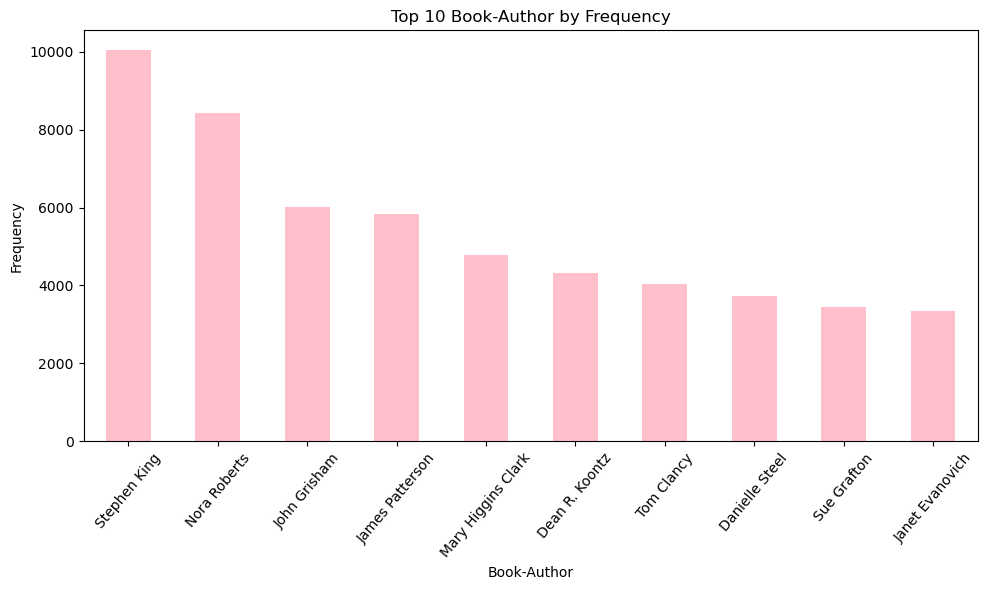

In [36]:
# Plotting the bar graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = 'Pink')
plt.xlabel('Book-Author')
plt.ylabel('Frequency')
plt.title("Top 10 Book-Author by Frequency")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [37]:
# Get the top 10 categories for Publisher
top_10=ratings_with_name["Publisher"].value_counts().head(10)
top_10

Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: count, dtype: int64

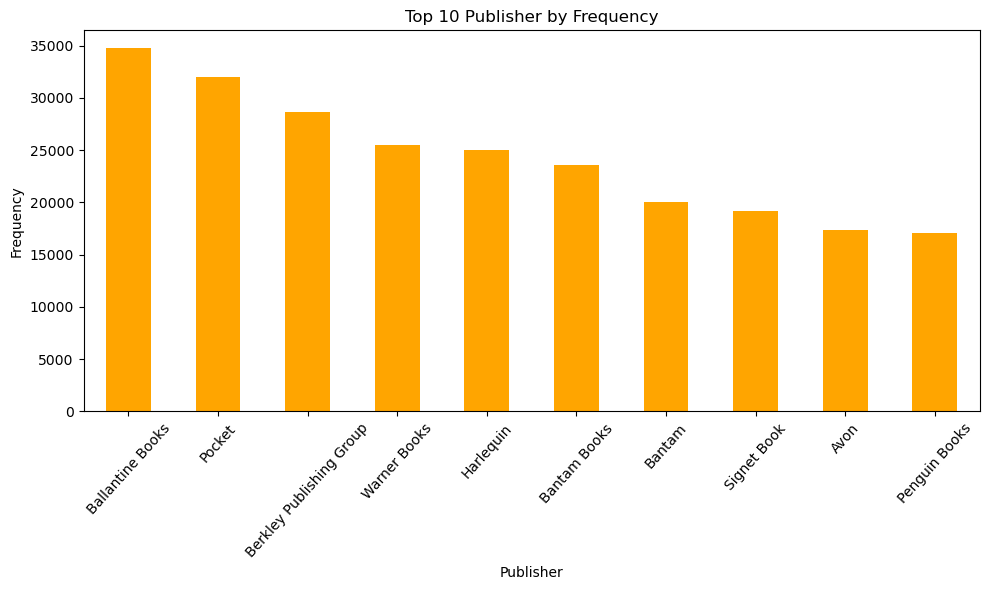

In [38]:
# Plotting the bar graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = 'orange')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.title("Top 10 Publisher by Frequency")
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()

In [39]:
#Boxplot

In [40]:
#Boxplot for Book-Rating column  and ISBN column

<Figure size 1500x1000 with 0 Axes>

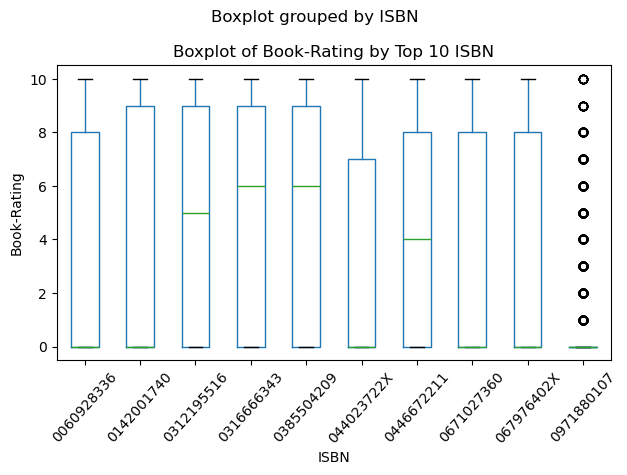

In [41]:
top_10 = ratings_with_name["ISBN"].value_counts().head(10)
filtered_df = ratings_with_name[ratings_with_name["ISBN"].isin(top_10.index)]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10 ))
filtered_df.boxplot(column='Book-Rating', by='ISBN', grid=False)
plt.xlabel('ISBN')
plt.ylabel('Book-Rating')
plt.title("Boxplot of Book-Rating by Top 10 ISBN")
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()

In [42]:
#Boxplot for Book-Rating column  and Book-Title column

<Figure size 1500x1000 with 0 Axes>

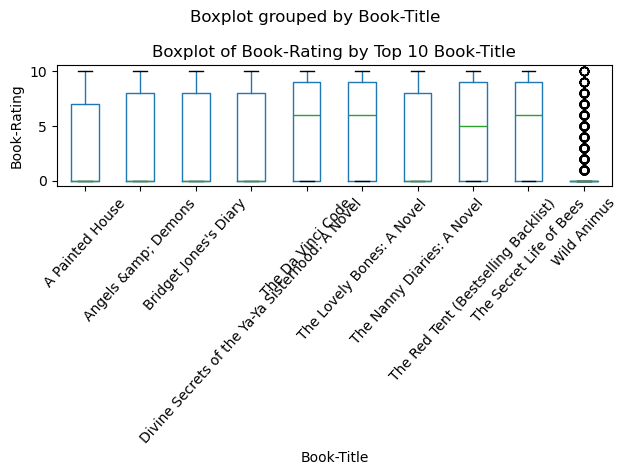

In [43]:
top_10 = ratings_with_name["Book-Title"].value_counts().head(10)
filtered_df = ratings_with_name[ratings_with_name["Book-Title"].isin(top_10.index)]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10 ))
filtered_df.boxplot(column='Book-Rating', by='Book-Title', grid=False)
plt.xlabel('Book-Title')
plt.ylabel('Book-Rating')
plt.title("Boxplot of Book-Rating by Top 10 Book-Title")
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()

In [44]:
#Boxplot for Book-Rating column  and Book-Author column

<Figure size 1500x1000 with 0 Axes>

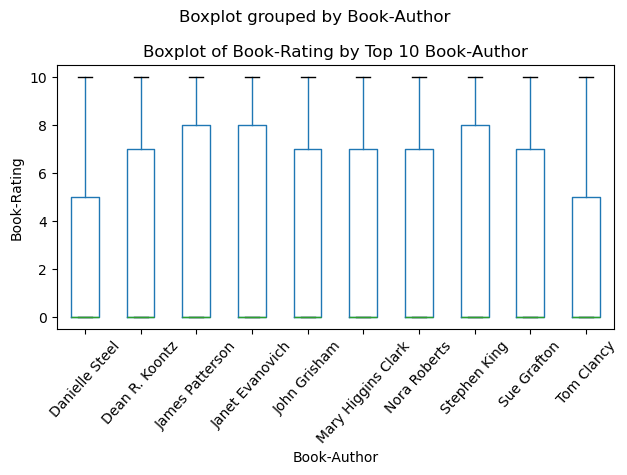

In [45]:
top_10 = ratings_with_name["Book-Author"].value_counts().head(10)
filtered_df = ratings_with_name[ratings_with_name["Book-Author"].isin(top_10.index)]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10 ))
filtered_df.boxplot(column='Book-Rating', by='Book-Author', grid=False)
plt.xlabel('Book-Author')
plt.ylabel('Book-Rating')
plt.title("Boxplot of Book-Rating by Top 10 Book-Author")
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()

In [46]:
#Boxplot for Book-Rating column  and Publisher column

<Figure size 1500x1000 with 0 Axes>

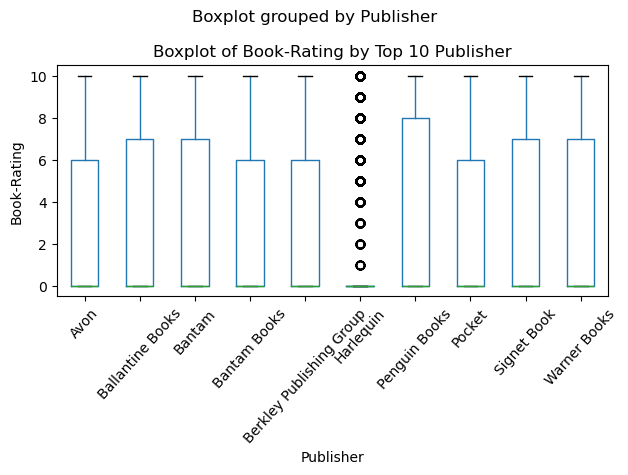

In [47]:
top_10 = ratings_with_name["Publisher"].value_counts().head(10)
filtered_df = ratings_with_name[ratings_with_name["Publisher"].isin(top_10.index)]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10 ))
filtered_df.boxplot(column='Book-Rating', by='Publisher', grid=False)
plt.xlabel('Publisher')
plt.ylabel('Book-Rating')
plt.title("Boxplot of Book-Rating by Top 10 Publisher")
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()

In [48]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [49]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [50]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,Book-Rating_x,Book-Rating_y
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [51]:
popular_df = popular_df[popular_df['Book-Rating_x']>=250].sort_values('Book-Rating_y',ascending=False).head(50)
popular_df

,Book-Title,Book-Rating_x,Book-Rating_y
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [52]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Book-Rating_x','Book-Rating_y']]
popular_df

,Book-Title,Book-Author,Image-URL-M,Book-Rating_x,Book-Rating_y
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [53]:
###########Collaborative Filtering Based Recommender System

Collaborative Filtering Based Recommender System

Selecting Users who have rated more than 200 books

There are only 811 users who have rated more than 200 books.

Selecting only those books which have more than 50 ratings

In [54]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [90]:
x.value_counts()

Book-Rating
False    91295
True       811
Name: count, dtype: int64

In [55]:
wellread_users = x[x].index
wellread_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [56]:
wellread_users.shape

(811,)

In [57]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(wellread_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...


In [58]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=40
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [91]:
y.value_counts()

Book-Rating
False    154789
True       1056
Name: count, dtype: int64

In [59]:
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1056)

In [60]:
famous_books.shape

(1056,)

In [61]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029269,275970,1573227951,0,An Instance of the Fingerpost,Iain Pears,2000,Riverhead Books,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [62]:
pt = final_ratings.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')
pt

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,0.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
275970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
277427,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
pt.fillna(0,inplace=True)

In [64]:
pt

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
####Making a list containing lists of similarity scores of each book with every other book

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
similarity_scores = cosine_similarity(pt)

In [68]:
similarity_scores

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.0838936 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0838936 , 1.        , ..., 0.        , 0.        ,
        0.04976086],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.04976086, ..., 0.        , 0.        ,
        1.        ]])

In [69]:
similarity_scores.shape

(810, 810)

In [103]:
def predict_rating(user_id, book_title):
    # Find the index of the user
    index = np.where(pt.index == user_id)[0][0]
    
    # Get the ratings from the most similar users
    similar_users = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    total_rating = 0
    count = 0
    
    for user in similar_users:
        similar_user_id = pt.index[user[0]]
        if book_title in pt.columns and not np.isnan(pt.at[similar_user_id, book_title]):
            total_rating += pt.at[similar_user_id, book_title]
            count += 1
    
    if count > 0:
        return total_rating / count  # Return the average rating from similar users
    else:
        return pt[book_title].mean()  # Fallback to the average rating for the book if no similar users have rated it

def recommend_and_evaluate(user_id):
    # Fetch index for the user_id
    index = np.where(pt.index == user_id)[0][0]
    
    # Get the most similar users (excluding the user itself)
    similar_users = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    recommended_books = []
    predictions = []
    actual_ratings = []
    
    for user in similar_users:
        similar_user_id = pt.index[user[0]]
        user_books = final_ratings[final_ratings['User-ID'] == similar_user_id]
        
        for _, row in user_books.iterrows():
            book = row['Book-Title']
            actual_rating = row['Book-Rating']  # Corrected to 'Book-Rating'
            
            # Predict rating for this book
            predicted_rating = predict_rating(user_id, book)
            
            # Store actual and predicted ratings for evaluation
            predictions.append(predicted_rating)
            actual_ratings.append(actual_rating)
            
            if book not in recommended_books:
                recommended_books.append(book)
                if len(recommended_books) >= 5:  # Limiting to top 5 recommendations
                    break
        if len(recommended_books) >= 5:
            break
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(np.mean((np.array(predictions) - np.array(actual_ratings)) ** 2))
    mae = np.mean(np.abs(np.array(predictions) - np.array(actual_ratings)))
    
    return recommended_books, rmse, mae

In [104]:
recommended_books, rmse, mae = recommend_and_evaluate(11676)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ['Dreamcatcher', 'Tell Me Lies (Tell Me Lies)', 'Crazy for You', 'Welcome to Temptation', 'Fast Women']
RMSE: 3.4281190177705327
MAE: 3.3200000000000003


In [101]:
recommended_books, rmse, mae = recommend_and_evaluate(254)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ['Bel Canto: A Novel', 'The Nanny Diaries: A Novel', 'Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel)', 'High Five (A Stephanie Plum Novel)', 'Hot Six : A Stephanie Plum Novel (A Stephanie Plum Novel)']
RMSE: 0.0
MAE: 0.0


In [102]:
recommended_books, rmse, mae = recommend_and_evaluate(277427)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ['Brave New World', 'Animal Dreams', 'Five Quarters of the Orange', 'Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson', "The Girls' Guide to Hunting and Fishing"]
RMSE: 3.8698837191833038
MAE: 2.4


In [105]:
recommended_books, rmse, mae = recommend_and_evaluate(2977)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ['Angels', 'Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'Fried Green Tomatoes at the Whistle Stop Cafe', 'The Street Lawyer', 'Ladder of Years']
RMSE: 0.0
MAE: 0.0


In [ ]:
aaaaa